In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from matplotlib.animation import FuncAnimation

# 10.2

$u_{t} + u_{x} = 0, \ 0 \leq x \leq L,\ 0\leq t\leq 18$

$u(0, t) = \ u(1, t), \ u(x, 0) = \sin(4\pi x / L)$


a) схему с разностями против потока

$
\dfrac{y_{m}^{n+1}-y_{m}^{n}}{\tau}+\dfrac{y_{m}^{n}-y_{m-1}^{n}}{h}=0
$

б) схему Лакса-Вендроффа

$
\dfrac{y_{m}^{n+1}-y_{m}^{n}}{\tau}+a \dfrac{y_{m+1}^{n}-y_{m-1}^{n}}{2 h}-\dfrac{a^{2} \tau}{2} \dfrac{y_{m+1}^{n}-2 y_{m}^{n}+y_{m-1}^{n}}{h^{2}}=0
$

In [23]:
def solve(tau, h, L, scheme):
    
    x = np.linspace(0, L, int(L/h), dtype='double')
    t = np.linspace(0, 18, int(18/tau), dtype='double')

    N = len(t)
    M = len(x)
    
    y = np.empty([N, M], dtype='double')
    
    for i in range(M):
        y[0][i] = np.sin(4*np.pi * x[i] / L)
        
    for i in range(N):
        y[i][0] = -np.sin(4*np.pi * t[i] / L)
        y[i][M-1] = -np.sin(4*np.pi * t[i] / L)

    for n in range(0, N-1):
        for m in range(1, M-1):
            if scheme == 1:
                y[n+1][m] = y[n][m] - tau / h * (y[n][m] - y[n][m-1])
            if scheme == 2:
                y[n+1][m] = 1/2 * (y[n][m + 1] + y[n][m - 1]) - tau / (2*h) * (y[n][m+1]-y[n][m-1])

    return y, x, t, N, M

In [24]:
def real_sol(x, t, L):
    return np.sin(4*np.pi * (x-t) / L)

In [25]:
def plot_n(n, y1, y2, x, t, L):
    plt.clf()
    plt.title(f"График функции при t = {t[n]:.3f}")
    plt.xlabel("x")
    plt.ylabel("u")
    
    plt.plot(x, y1[n], label='решение схемой с разностями')
    plt.plot(x, y2[n], label='решение схемой Лакса-Вендроффа')
    plt.plot(x, real_sol(x, t[n], L), label='реальное решение')
    plt.legend()
    
    return plt

In [26]:
h = 0.5
L = 0.5 * 41
y1, x, t, N, M = solve(h, h, L, 1)
y2, _, _, _, _ = solve(h, h, L, 2)

<IPython.core.display.Javascript object>


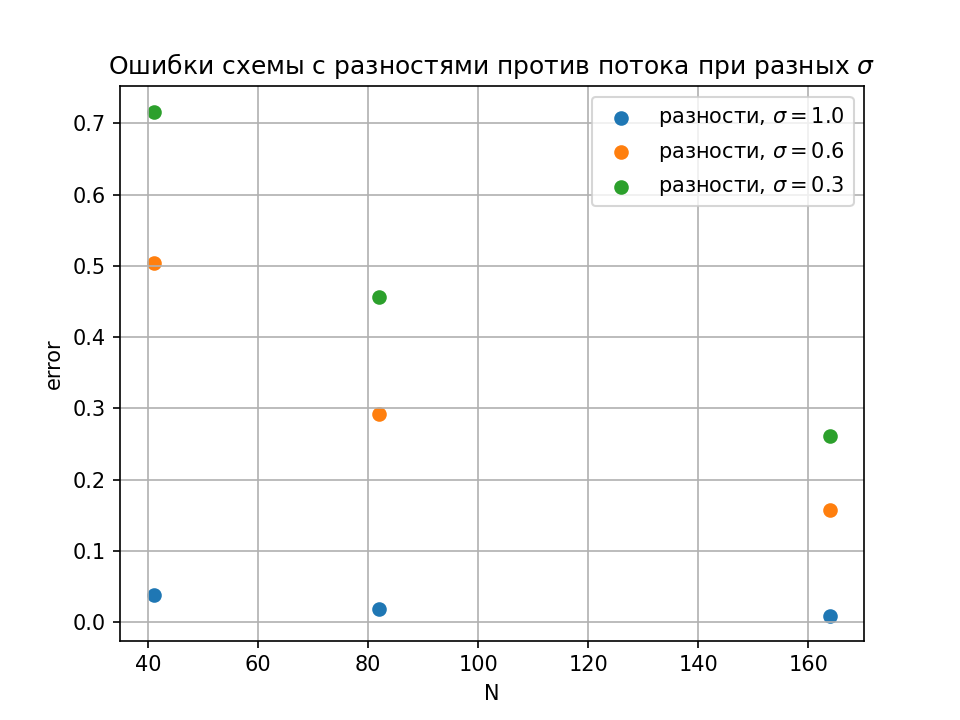

In [28]:

num_frames = 5
def animate(n):
    #n = int(n / num_frames * N)
    plot_n(n, y1, y2, x, t, L)
    
anim = anime.FuncAnimation(plt.figure(), animate, interval = 20, frames = N, repeat = False)
plt.show()

Теперь проверим реальную сходимость схем: сравним как меняется ошибка при фиксированном числе куранта при сгущении сеток вдвое

In [29]:
def error(sigma, L, N, scheme):
    y, x, t, N, M = solve(sigma*L/N, L / N, L, scheme)
    err = np.empty_like(y, dtype='double')
    
    for i in range(len(y)):
        for j in range(len(y[0])):
            err[i][j] = np.abs(y[i][j] - real_sol(x[j],t[i], L))
    return np.amax(err)

In [30]:
sigma = np.array([1, 0.6, 0.3])
N = np.array([41, 82, 164])
err1 = np.empty([len(sigma), len(N)], dtype=np.float64)
err2 = np.empty([len(sigma), len(N)], dtype=np.float64)

for i in range(len(sigma)):
    for j in range(len(N)):
        err1[i][j] = error(sigma[i], L, N[j], 1)
        err2[i][j] = error(sigma[i], L, N[j], 2)

<IPython.core.display.Javascript object>


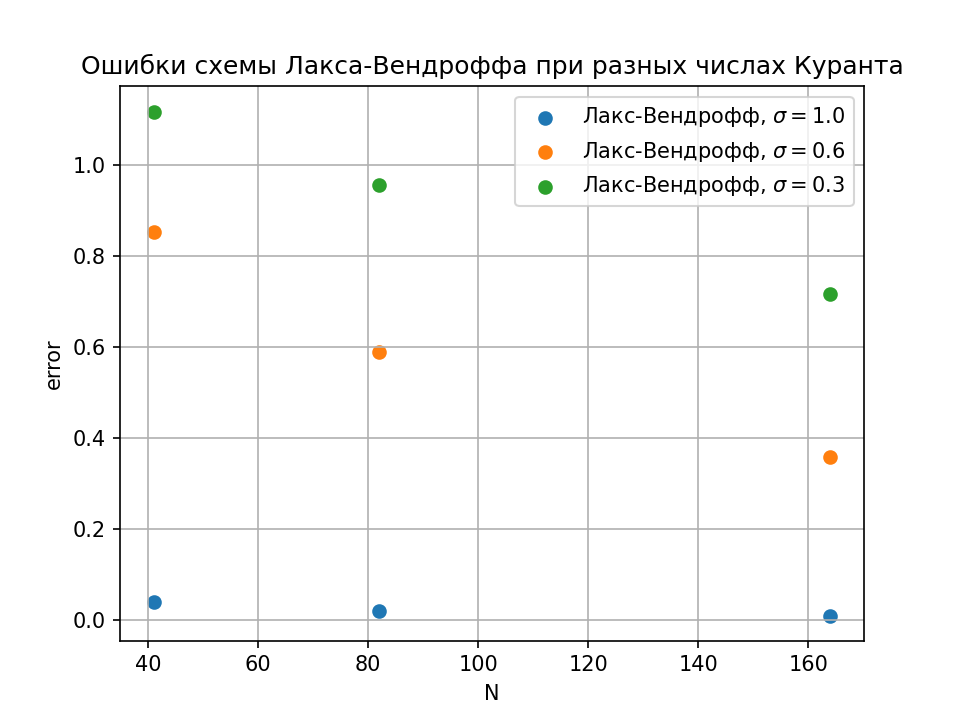

In [32]:
plt.clf()

for i in range(len(sigma)):
    plt.scatter(N, err1[i], label='разности, $\sigma=$' + str(sigma[i]))
    
plt.xlabel('N')
plt.ylabel('error')
plt.title('Ошибки схемы с разностями против потока при разных $\sigma$')
plt.grid()
plt.legend()
plt.show()

In [33]:
plt.clf()

for i in range(len(sigma)):
    plt.scatter(N, err2[i], label='Лакс-Вендрофф, $\sigma=$' + str(sigma[i]))
plt.xlabel('N')
plt.ylabel('error')
plt.title('Ошибки схемы Лакса-Вендроффа при разных числах Куранта')
plt.grid()
plt.legend()
plt.show()